# **Unsupervised Learning 🔍**  

In this section, we explore an important branch of machine learning: **unsupervised learning**. Instead of diving deeply into theoretical details, the focus here is on **practical applications**. Our goal is to provide a **hands-on approach** to using unsupervised learning techniques effectively in **Earth Observation (EO) scenarios** 🌍.  

While unsupervised learning has **diverse applications**, this notebook primarily focuses on **classification tasks**. These techniques are particularly powerful in **recognizing patterns** and **categorizing data** when explicit labels are not available. By applying these methods, you'll learn how to **extract meaningful structures** from datasets, even when predefined labels are absent.  

---

### **📌 Tasks Covered in This Notebook**  

🔹 **Classifying Sea Ice and Leads using Sentinel-2 Optical Data**  
&nbsp;&nbsp;&nbsp;&nbsp;🛰️ Applying **image-based classification techniques** to distinguish between **sea ice and leads** using **Sentinel-2 satellite imagery**.  

🔹 **Classifying Sea Ice and Leads using Sentinel-3 Altimetry Data**  
&nbsp;&nbsp;&nbsp;&nbsp;🌊 Utilizing **altimetry-based classification** from **Sentinel-3** to differentiate between **sea ice and leads**.  

---

By the end of this notebook, you'll have a **solid understanding** of how **unsupervised learning methods** can be applied to **real-world remote sensing data** for effective classification. 🚀  


## Introduction to Unsupervised Learning Methods {cite}`bishop2006pattern`

### Understanding K-means Clustering

K-means clustering is a widely used **unsupervised learning algorithm** designed to **partition a dataset into k distinct groups (clusters)**. The number of clusters, denoted as **k**, is determined beforehand by the user. The algorithm works by analyzing feature similarities among data points and grouping them accordingly {cite}`macqueen1967some`. At its core, K-means assigns each data point to the nearest cluster centroid and iteratively refines these centroids to optimize the grouping.

### Why Use K-means for Clustering?

K-means is particularly effective when working with **large datasets** where the underlying structure is unknown. It is commonly used because:

- **No Prior Knowledge Required**: Unlike supervised learning, K-means does not rely on labeled data, making it useful for **exploratory analysis**.
- **Computationally Efficient**: The algorithm is relatively **fast and scalable**, making it practical for large datasets.
- **Works Well with Well-separated Clusters**: K-means is particularly effective when clusters are compact and distinct.

### How K-means Works: Key Components

1. **Choosing the Number of Clusters (k)**  
   - The number of clusters must be specified before running the algorithm. Techniques like the **Elbow Method** or **Silhouette Score** can help determine an optimal k.  

2. **Initializing Centroids**  
   - The algorithm starts by placing **k centroids** randomly in the feature space. The placement of these initial centroids can impact the final clustering outcome.  

3. **Assignment Step**  
   - Each data point is assigned to the **nearest centroid**, usually based on the **Euclidean distance**.  

4. **Update Step**  
   - The centroids are updated by calculating the **mean position** of all data points assigned to a given cluster.  

5. **Convergence**  
   - The process is repeated until the centroids **no longer change significantly**, meaning the clustering has stabilized.

### The Iterative Process of K-means

K-means follows an iterative approach where it alternates between **assignment and update steps**. Over multiple iterations, the algorithm **minimizes intra-cluster variance**, ensuring that data points within each cluster are as similar as possible. However, K-means may converge to a **local optimum**, depending on the initial centroid placement.

### Strengths of K-means

- **Computational Speed**: Works well even for large datasets.
- **Simple and Interpretable**: The results are easy to understand and visualize.
- **Adaptability**: Can be fine-tuned for different applications by adjusting k or using variations like **K-means++** for better centroid initialization.

### Basic Implementation of K-Means Clustering 🔍

Below is a simple implementation of K-means clustering. This serves as a **starting point** for applying the algorithm to real-world datasets and can be adapted based on specific data needs.


In [1]:
#mount your google drive where the files are located
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# this package is important in order to run the next cells
!pip install rasterio

In [12]:
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.7 MB/s eta 0:00:00


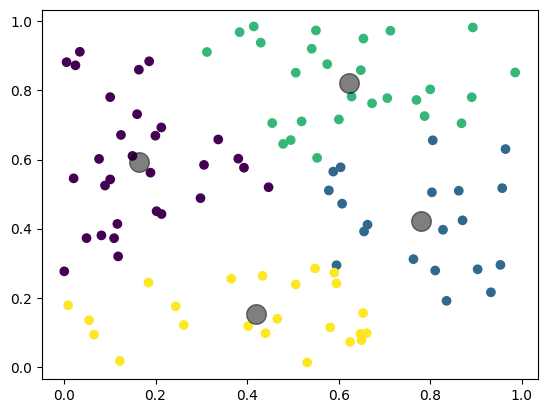

In [4]:


# import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# generate sample data with 100 random points in 2d space
X = np.random.rand(100, 2)

# initialize k-means model with 4 clusters
kmeans = KMeans(n_clusters=4)

# fit the k-means model to the data
kmeans.fit(X)

# predict the cluster labels for each data point
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

# get the cluster centers
centers = kmeans.cluster_centers_

# plot the cluster centers as black dots
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()




### **Explanations 🔍**  

This example demonstrates a **simple K-Means clustering model**, applied to a **randomly generated 2D dataset**:  

✅ **How It Works:**  
1. **100 random data points** are generated.  
2. The **K-Means algorithm** is initialized with **4 clusters (k=4)**.  
3. The model **assigns each data point** to the closest cluster.  
4. The **cluster centers** (centroids) are calculated and plotted as **black dots**.  

🔍 **Key Observations:**  
- Data points are **grouped into four distinct clusters** based on feature similarity.  
- Cluster centroids **represent the average position** of points within each group.  
- This approach can be **extended to real-world datasets** for **pattern recognition and classification**.  

This serves as a **foundational step** for using **unsupervised learning methods** in real-world applications. 🚀  


## Gaussian Mixture Models (GMM) {cite}`bishop2006pattern`

### Introduction to Gaussian Mixture Models

Gaussian Mixture Models (GMM) are a probabilistic model for representing normally distributed subpopulations within an overall population. The model assumes that the data is generated from a mixture of several Gaussian distributions, each with its own mean and variance {cite}`reynolds2009gaussian, mclachlan2004finite`. GMMs are widely used for clustering and density estimation, as they provide a method for representing complex distributions through the combination of simpler ones.

### Why Gaussian Mixture Models for Clustering?

Gaussian Mixture Models are particularly powerful in scenarios where:

- **Soft clustering is needed**: Unlike K-means, GMM provides the probability of each data point belonging to each cluster, offering a soft classification and understanding of the uncertainties in our data.
- **Flexibility in cluster covariance**: GMM allows for clusters to have different sizes and different shapes, making it more flexible to capture the true variance in the data.

### Key Components of GMM

1. **Number of Components (Gaussians)**: Similar to K in K-means, the number of Gaussians (components) is a parameter that needs to be set.
2. **Expectation-Maximization (EM) Algorithm**: GMMs use the EM algorithm for fitting, iteratively improving the likelihood of the data given the model.
3. **Covariance Type**: The shape, size, and orientation of the clusters are determined by the covariance type of the Gaussians (e.g., spherical, diagonal, tied, or full covariance).

### The EM Algorithm in GMM

The Expectation-Maximization (EM) algorithm is a two-step process:

- **Expectation Step (E-step)**: Calculate the probability that each data point belongs to each cluster.
- **Maximization Step (M-step)**: Update the parameters of the Gaussians (mean, covariance, and mixing coefficient) to maximize the likelihood of the data given these assignments.

This process is repeated until convergence, meaning the parameters do not significantly change from one iteration to the next.

### Advantages of GMM

- **Soft Clustering**: Provides a probabilistic framework for soft clustering, giving more information about the uncertainties in the data assignments.
- **Cluster Shape Flexibility**: Can adapt to ellipsoidal cluster shapes, thanks to the flexible covariance structure.




### **Basic Implementation of Gaussian Mixture Model (GMM) 🔍**  

✅ This example demonstrates how **Gaussian Mixture Models (GMM)** can be used for **clustering** in an **unsupervised learning setting**. Unlike K-Means, GMM provides a **probabilistic approach**, allowing for **soft clustering** where points have a probability of belonging to multiple clusters.  





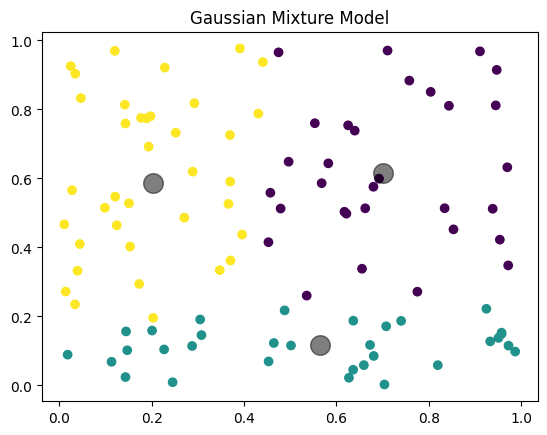

In [9]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# generate some random 2d data points
X = np.random.rand(100, 2)

# initialize gmm with 3 clusters and fit the data
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# predict cluster labels for each point
y_gmm = gmm.predict(X)

# plot data points, colored by assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')

# get cluster centers (means of each gaussian component)
centers = gmm.means_

# plot the cluster centers as black dots
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()





### **Explanations🔍**  

This example demonstrates a **simple K-Means clustering model**, applied to a **randomly generated 2D dataset**:  

✅ **How It Works:**  
1. **100 random data points** are generated.  
2. The **K-Means algorithm** is initialized with **4 clusters (k=4)**.  
3. The model **assigns each data point** to the closest cluster.  
4. The **cluster centers** (centroids) are calculated and plotted as **black dots**.  

🔍 **Key Observations:**  
- Data points are **grouped into four distinct clusters** based on feature similarity.  
- Cluster centroids **represent the average position** of points within each group.  
- This approach can be **extended to real-world datasets** for **pattern recognition and classification**.  

This serves as a **foundational step** for using **unsupervised learning methods** in real-world applications. 🚀  


## Image Classification
Now, let's explore the application of these unsupervised methods to image classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-2 imagery.

### K-Means Implementation

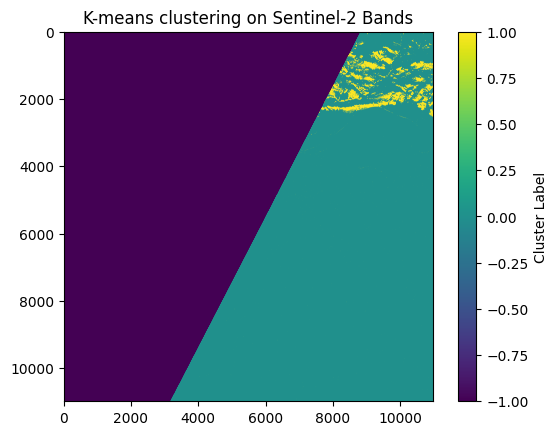

In [17]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/week4/Unsupervised Learning/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()

del kmeans, labels, band_data, band_stack, valid_data_mask, X, labels_image


### **Observations from K-Means Clustering on Sentinel-2 Imagery**

The K-means clustering results reveal a **clear separation** between two dominant regions in the Sentinel-2 image:  

- **Dark purple region**: This corresponds to areas classified as one cluster, which likely represents **open water (leads)** due to its lower reflectance in the selected spectral band.  
- **Teal and yellow regions**: These represent **sea ice**, which has a higher reflectance and appears more structured. The yellow highlights in certain areas suggest potential **ice ridges or mixed ice conditions**.  

#### **Insights & Limitations**  
✔️ **Strengths:**  
- The algorithm successfully distinguishes **sea ice from open leads** with a simple two-cluster approach.  
- The classification aligns well with expected Sentinel-2 spectral properties.  

⚠️ **Potential Issues:**  
- **Cluster boundary sharpness**: The separation appears **linear**, which may indicate sensitivity to band selection or a lack of adaptive spatial constraints.  
- **Misclassification risk**: Some areas with **varying ice conditions** (e.g., thin ice or melt ponds) might be classified incorrectly, requiring further refinement with additional spectral bands or alternative clustering methods like **Gaussian Mixture Models (GMM)**.  

This result provides a **baseline for unsupervised classification**, but future refinements can be made using **multi-band integration or different clustering techniques** to improve accuracy.  


### GMM Implementation

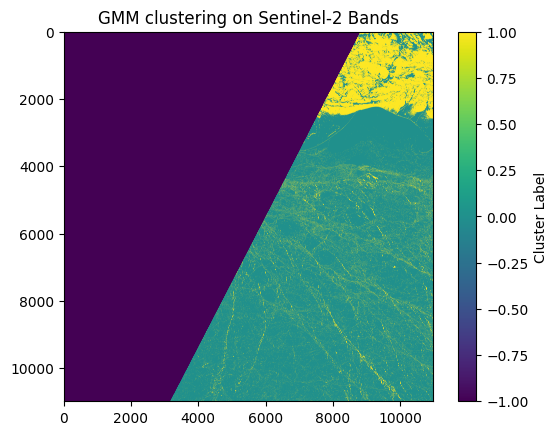

In [8]:
import rasterio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Paths to the band images
base_path = "//content/drive/MyDrive/week4/Unsupervised Learning/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for GMM, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 1))

# GMM clustering
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place GMM labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('GMM clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()


### **Observations from GMM Clustering on Sentinel-2 Imagery**

The GMM clustering results demonstrate a **smooth segmentation** between two dominant regions in the Sentinel-2 image:

- **Dark purple region**: Likely represents **open water (leads)** with lower reflectance values.
- **Teal and yellow regions**: Correspond to **sea ice**, where varying shades suggest different ice conditions or mixed surfaces.

#### **Comparison with K-Means**
- Unlike K-Means, **GMM provides a probabilistic classification**, which may help in identifying transition zones between leads and sea ice.
- The **boundaries appear less abrupt**, indicating that GMM captures **gradual variations** better than K-Means.

#### **Potential Improvements**
- Using **more spectral bands** could enhance classification accuracy.
- Adjusting the **number of components (n_components)** in GMM could refine the segmentation further.

While GMM offers **a more nuanced classification**, its sensitivity to initialization and computational cost should be considered when scaling up to larger datasets.


## Altimetry Classification
Now, let's explore the application of these unsupervised methods to altimetry classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-3 altimetry dataset.

### Read in Functions Needed
Before delving into the modeling process, it's crucial to preprocess the data to ensure compatibility with our analytical models. This involves transforming the raw data into meaningful variables, such as peakniness and stack standard deviation (SSD), etc.

In [10]:
#
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import glob
from matplotlib.patches import Polygon
import scipy.spatial as spatial
from scipy.spatial import KDTree
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster

#=========================================================================================================
#===================================  SUBFUNCTIONS  ======================================================
#=========================================================================================================

#*args and **kwargs allow you to pass an unspecified number of arguments to a function,
#so when writing the function definition, you do not need to know how many arguments will be passed to your function
#**kwargs allows you to pass keyworded variable length of arguments to a function.
#You should use **kwargs if you want to handle named arguments in a function.
#double star allows us to pass through keyword arguments (and any number of them).
def peakiness(waves, **kwargs):

    "finds peakiness of waveforms."

    #print("Beginning peakiness")
    # Kwargs are:
    #          wf_plots. specify a number n: wf_plots=n, to show the first n waveform plots. \

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import time

    print("Running peakiness function...")

    size=np.shape(waves)[0] #.shape property is a tuple of length .ndim containing the length of each dimensions
                            #Tuple of array dimensions.

    waves1=np.copy(waves)

    if waves1.ndim == 1: #number of array dimensions
        print('only one waveform in file')
        waves2=waves1.reshape(1,np.size(waves1)) #numpy.reshape(a, newshape, order='C'), a=array to be reshaped
        waves1=waves2

    # *args is used to send a non-keyworded variable length argument list to the function
    def by_row(waves, *args):
        "calculate peakiness for each waveform"
        maximum=np.nanmax(waves)
        if maximum > 0:

            maximum_bin=np.where(waves==maximum)
            #print(maximum_bin)
            maximum_bin=maximum_bin[0][0]
            waves_128=waves[maximum_bin-50:maximum_bin+78]

            waves=waves_128

            noise_floor=np.nanmean(waves[10:20])
            where_above_nf=np.where(waves > noise_floor)

            if np.shape(where_above_nf)[1] > 0:
                maximum=np.nanmax(waves[where_above_nf])
                total=np.sum(waves[where_above_nf])
                mean=np.nanmean(waves[where_above_nf])
                peaky=maximum/mean

            else:
                peaky = np.nan
                maximum = np.nan
                total = np.nan

        else:
            peaky = np.nan
            maximum = np.nan
            total = np.nan

        if 'maxs' in args:
            return maximum
        if 'totals' in args:
            return total
        if 'peaky' in args:
            return peaky

    peaky=np.apply_along_axis(by_row, 1, waves1, 'peaky') #numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)

    if 'wf_plots' in kwargs:
        maximums=np.apply_along_axis(by_row, 1, waves1, 'maxs')
        totals=np.apply_along_axis(by_row, 1, waves1, 'totals')

        for i in range(0,kwargs['wf_plots']):
            if i == 0:
                print("Plotting first "+str(kwargs['wf_plots'])+" waveforms")

            plt.plot(waves1[i,:])#, a, col[i],label=label[i])
            plt.axhline(maximums[i], color='green')
            plt.axvline(10, color='r')
            plt.axvline(19, color='r')
            plt.xlabel('Bin (of 256)')
            plt.ylabel('Power')
            plt.text(5,maximums[i],"maximum="+str(maximums[i]))
            plt.text(5,maximums[i]-2500,"total="+str(totals[i]))
            plt.text(5,maximums[i]-5000,"peakiness="+str(peaky[i]))
            plt.title('waveform '+str(i)+' of '+str(size)+'\n. Noise floor average taken between red lines.')
            plt.show()


    return peaky

#=========================================================================================================
#=========================================================================================================
#=========================================================================================================


def unpack_gpod(variable):

    from scipy.interpolate import interp1d

    time_1hz=SAR_data.variables['time_01'][:]
    time_20hz=SAR_data.variables['time_20_ku'][:]
    time_20hzC = SAR_data.variables['time_20_c'][:]

    out=(SAR_data.variables[variable][:]).astype(float)  # convert from integer array to float.

    #if ma.is_masked(dataset.variables[variable][:]) == True:
    #print(variable,'is masked. Removing mask and replacing masked values with nan')
    out=np.ma.filled(out, np.nan)

    if len(out)==len(time_1hz):

        print(variable,'is 1hz. Expanding to 20hz...')
        out = interp1d(time_1hz,out,fill_value="extrapolate")(time_20hz)

    if len(out)==len(time_20hzC):
        print(variable, 'is c band, expanding to 20hz ku band dimension')
        out = interp1d(time_20hzC,out,fill_value="extrapolate")(time_20hz)
    return out


#=========================================================================================================
#=========================================================================================================
#=========================================================================================================

def calculate_SSD(RIP):

    from scipy.optimize import curve_fit
    # from scipy import asarray as ar,exp
    from numpy import asarray as ar, exp

    do_plot='Off'

    def gaussian(x,a,x0,sigma):
            return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

    SSD=np.zeros(np.shape(RIP)[0])*np.nan
    x=np.arange(np.shape(RIP)[1])

    for i in range(np.shape(RIP)[0]):

        y=np.copy(RIP[i])
        y[(np.isnan(y)==True)]=0

        if 'popt' in locals():
            del(popt,pcov)

        SSD_calc=0.5*(np.sum(y**2)*np.sum(y**2)/np.sum(y**4))
        #print('SSD calculated from equation',SSD)

        #n = len(x)
        mean_est = sum(x * y) / sum(y)
        sigma_est = np.sqrt(sum(y * (x - mean_est)**2) / sum(y))
        #print('est. mean',mean,'est. sigma',sigma_est)

        try:
            popt,pcov = curve_fit(gaussian, x, y, p0=[max(y), mean_est, sigma_est],maxfev=10000)
        except RuntimeError as e:
            print("Gaussian SSD curve-fit error: "+str(e))
            #plt.plot(y)
            #plt.show()

        except TypeError as t:
            print("Gaussian SSD curve-fit error: "+str(t))

        if do_plot=='ON':

            plt.plot(x,y)
            plt.plot(x,gaussian(x,*popt),'ro:',label='fit')
            plt.axvline(popt[1])
            plt.axvspan(popt[1]-popt[2], popt[1]+popt[2], alpha=0.15, color='Navy')
            plt.show()

            print('popt',popt)
            print('curve fit SSD',popt[2])

        if 'popt' in locals():
            SSD[i]=abs(popt[2])


    return SSD


In [ ]:
path = '//content/drive/MyDrive/week4/Unsupervised Learning/'
SAR_file = 'S3A_SR_2_LAN_SI_20190307T005808_20190307T012503_20230527T225016_1614_042_131______LN3_R_NT_005.SEN3'
SAR_data = Dataset(path + SAR_file + '/enhanced_measurement.nc')

SAR_lat = unpack_gpod('lat_20_ku')
SAR_lon = unpack_gpod('lon_20_ku')
waves   = unpack_gpod('waveform_20_ku')
sig_0   = unpack_gpod('sig0_water_20_ku')
RIP     = unpack_gpod('rip_20_ku')
flag = unpack_gpod('surf_type_class_20_ku')

# Filter out bad data points using criteria (here, lat >= -99999)
find = np.where(SAR_lat >= -99999)
SAR_lat = SAR_lat[find]
SAR_lon = SAR_lon[find]
waves   = waves[find]
sig_0   = sig_0[find]
RIP     = RIP[find]

# Calculate additional features
PP = peakiness(waves)
SSD = calculate_SSD(RIP)

# Convert to numpy arrays (if not already)
sig_0_np = np.array(sig_0)
PP_np    = np.array(PP)
SSD_np   = np.array(SSD)

# Create data matrix
data = np.column_stack((sig_0_np, PP_np, SSD_np))

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

There are some NaN values in the dataset so one way to deal with this is to delete them.

In [12]:
# Remove any rows that contain NaN values
nan_count = np.isnan(data_normalized).sum()
print(f"Number of NaN values in the array: {nan_count}")

data_cleaned = data_normalized[~np.isnan(data_normalized).any(axis=1)]

mask = ~np.isnan(data_normalized).any(axis=1)
waves_cleaned = np.array(waves)[mask]
flag_cleaned = np.array(flag)[mask]

data_cleaned = data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]
waves_cleaned = waves_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]
flag_cleaned = flag_cleaned[(flag_cleaned==1)|(flag_cleaned==2)]


Number of NaN values in the array: 1283


Now, let's proceed with running the GMM model as usual. Remember, you have the flexibility to substitute this with K-Means or any other preferred model.

In [13]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data_cleaned)
clusters_gmm = gmm.predict(data_cleaned)

We can also inspect how many data points are there in each class of your clustering prediction.

In [14]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Cluster counts:", class_counts)

Cluster counts: {0: 8880, 1: 3315}


We can plot the mean waveform of each class.

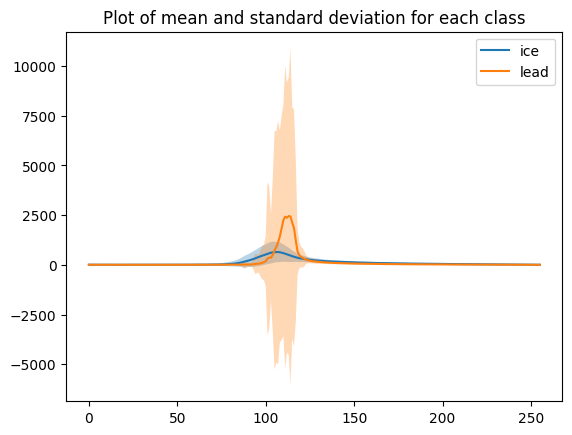

In [15]:
# mean and standard deviation for all echoes
mean_ice = np.mean(waves_cleaned[clusters_gmm==0],axis=0)
std_ice = np.std(waves_cleaned[clusters_gmm==0], axis=0)

plt.plot(mean_ice, label='ice')
plt.fill_between(range(len(mean_ice)), mean_ice - std_ice, mean_ice + std_ice, alpha=0.3)


mean_lead = np.mean(waves_cleaned[clusters_gmm==1],axis=0)
std_lead = np.std(waves_cleaned[clusters_gmm==1], axis=0)

plt.plot(mean_lead, label='lead')
plt.fill_between(range(len(mean_lead)), mean_lead - std_lead, mean_lead + std_lead, alpha=0.3)

plt.title('Plot of mean and standard deviation for each class')
plt.legend()

### **Mean & Standard Deviation Analysis 📊**  

This plot visualizes the **average echo shape** for **sea ice** and **leads**, along with their **standard deviation**:  

✅ **Ice (Blue Line)**: Shows a relatively stable and uniform distribution.  
✅ **Leads (Orange Line)**: Exhibits higher variability, indicating more dynamic surface properties.  

🔍 **Key Insight:**  
- **Leads have a higher standard deviation**, suggesting more fluctuation in reflectance.  
- **Sea ice remains more consistent**, reflecting its uniform surface structure.  

This helps in distinguishing between the two classes effectively using statistical properties! 🚀  


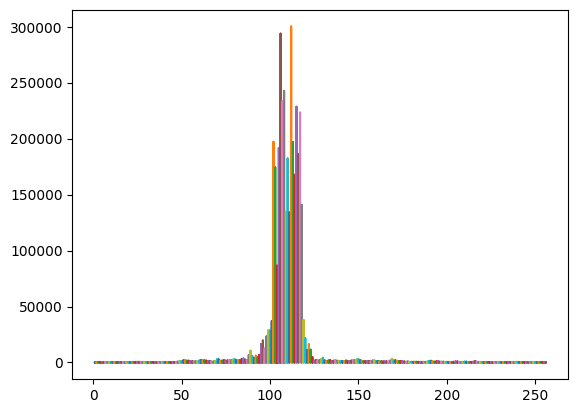

In [16]:
x = np.stack([np.arange(1,waves_cleaned.shape[1]+1)]*waves_cleaned.shape[0])
plt.plot(x,waves_cleaned)  # plot of all the echos
plt.show()

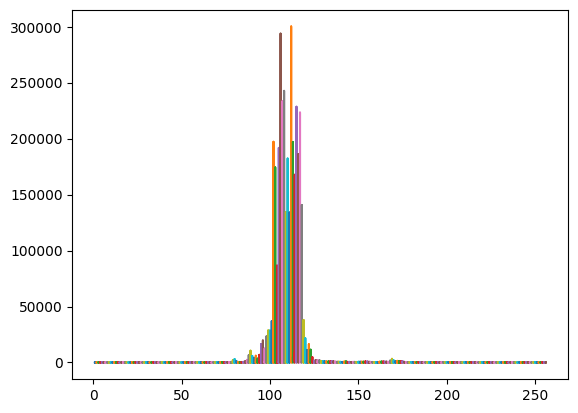

In [18]:
# plot echos for the lead cluster
x = np.stack([np.arange(1,waves_cleaned[clusters_gmm==1].shape[1]+1)]*waves_cleaned[clusters_gmm==1].shape[0])
plt.plot(x,waves_cleaned[clusters_gmm==1])  # plot of all the echos
plt.show()

### **Lead Cluster Echo Patterns 📡**  

This plot displays the **raw echo signals** detected within the **lead cluster**:  

✅ **Sharp peaks & high intensity**: Indicates strong variations in backscatter, likely due to surface roughness or open water conditions.  
✅ **Consistent central peak**: Suggests a dominant reflectance pattern, potentially influenced by ice edges or thin ice layers.  

🔍 **Key Takeaway:**  
- Leads exhibit **higher variability in echo intensity**, distinguishing them from sea ice.  
- These insights are useful for refining classification models based on **echo signal characteristics**.  


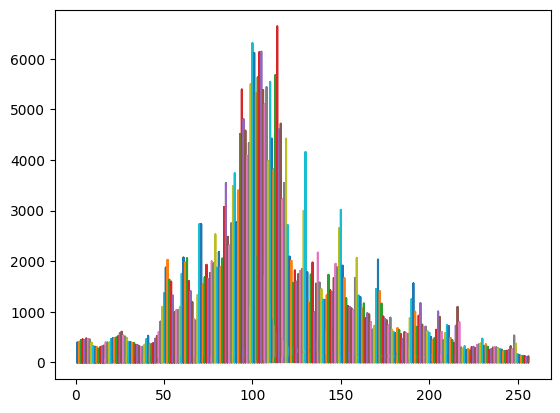

In [19]:
# plot echos for the sea ice cluster
x = np.stack([np.arange(1,waves_cleaned[clusters_gmm==0].shape[1]+1)]*waves_cleaned[clusters_gmm==0].shape[0])
plt.plot(x,waves_cleaned[clusters_gmm==0])  # plot of all the echos
plt.show()

### **Sea Ice Cluster Echo Patterns ❄️**  

This plot visualizes the **echo signals** for the **sea ice cluster**:  

✅ **More uniform distribution**: Indicates a stable and consistent backscatter pattern, characteristic of solid ice surfaces.  
✅ **Lower variability compared to leads**: Suggests that sea ice generally reflects signals more consistently due to its relatively smooth and homogeneous structure.  

🔍 **Key Takeaway:**  
- Sea ice echoes **exhibit less fluctuation** compared to leads, making them distinguishable in classification models.  
- The **higher density of signals** within a specific range further validates the differences in surface properties between **sea ice and open water leads**.  


## Scatter Plots of Clustered Data

This code visualizes the clustering results using scatter plots, where different colors represent different clusters (`clusters_gmm`).

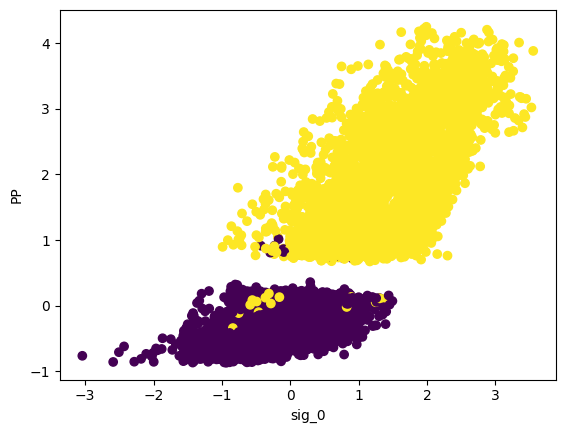

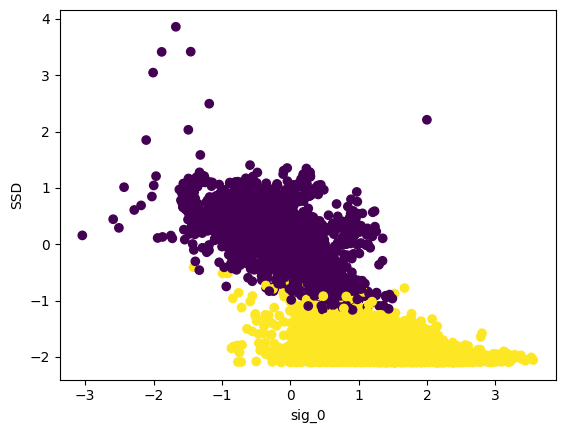

Text(0, 0.5, 'SSD')

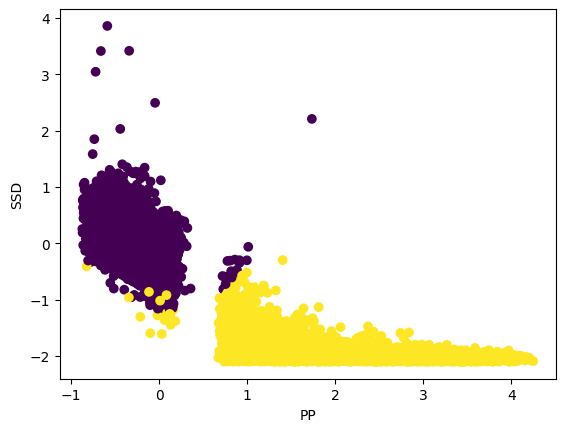

In [20]:
# scatter plots to visualize the clustered data using gmm
# each plot shows the relationship between two features, with colors representing different clusters
plt.scatter(data_cleaned[:,0],data_cleaned[:,1],c=clusters_gmm)
plt.xlabel("sig_0")
plt.ylabel("PP")
plt.show()
plt.scatter(data_cleaned[:,0],data_cleaned[:,2],c=clusters_gmm)
plt.xlabel("sig_0")
plt.ylabel("SSD")
plt.show()
plt.scatter(data_cleaned[:,1],data_cleaned[:,2],c=clusters_gmm)
plt.xlabel("PP")
plt.ylabel("SSD")

### **Scatter Plots of Clustered Data 📊**  

These scatter plots visualize the clustering results, with **different colors representing different clusters** identified by GMM:  

✅ **First Plot (PP vs sig_0 )**  
   - Shows a **clear separation** between the two clusters, indicating that **PP values** help distinguish between sea ice and leads.  

✅ **Second Plot (SSD vs sig_0 )**  
   - Displays **opposite trends**, where one cluster dominates lower SSD values, while the other spreads more widely.  

✅ **Third Plot ( SSD vs PP )**  
   - Reveals a **strong division**, reinforcing that these two features contain **valuable information for classification**.  

🔍 **Key Takeaway:**  
- The clustering model effectively differentiates sea ice and leads based on these feature relationships.  
- The **feature space is well-separated**, suggesting that these variables are useful in classification models.  


## Waveform Alignment Using Cross-Correlation

This code aligns waveforms in the cluster where `clusters_gmm == 0` by using cross-correlation.



Text(0.5, 1.0, 'Plot of 10 equally spaced functions where clusters_gmm = 0 (aligned)')

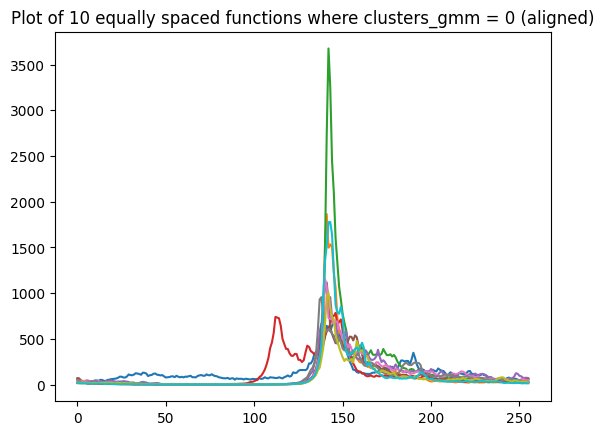

In [21]:
from scipy.signal import correlate

# Find the reference point (e.g., the peak)
reference_point_index = np.argmax(np.mean(waves_cleaned[clusters_gmm==0], axis=0))

# Calculate cross-correlation with the reference point
aligned_waves = []
for wave in waves_cleaned[clusters_gmm==0][::len(waves_cleaned[clusters_gmm == 0]) // 10]:
    correlation = correlate(wave, waves_cleaned[clusters_gmm==0][0])
    shift = len(wave) - np.argmax(correlation)
    aligned_wave = np.roll(wave, shift)
    aligned_waves.append(aligned_wave)

# Plot aligned waves
for aligned_wave in aligned_waves:
    plt.plot(aligned_wave)

plt.title('Plot of 10 equally spaced functions where clusters_gmm = 0 (aligned)')

### **Waveform Alignment Using Cross-Correlation 🔄**  

This visualization shows **aligned waveforms** for the cluster where **clusters_gmm = 0** (likely sea ice), using **cross-correlation** to adjust their positions.  

✅ **Why Alignment?**  
- Waveforms may have slight shifts in position due to **signal variability**.  
- Aligning them helps in identifying consistent **patterns and peak structures**.  

✅ **How It Works?**  
- A **reference waveform** is chosen based on the **mean peak position** across all signals.  
- Each waveform is **shifted** to align with the reference using **cross-correlation**.  
- This ensures a **better comparison** across different signals in the same cluster.  

🔍 **Key Takeaway:**  
- The **aligned waveforms** show a **strong central peak**, reinforcing that signals in this cluster share a common structure.  
- This approach is **useful for feature extraction** and improving classification accuracy.  


## Compare with ESA data
In the ESA dataset, sea ice = 1 and lead = 2. Therefore, we need to subtract 1 from it so our predicted labels are comparable with the official product labels.

In [22]:
flag_cleaned_modified = flag_cleaned - 1

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = flag_cleaned_modified   # true labels from the ESA dataset
predicted_gmm = clusters_gmm          # predicted labels from GMM method

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_gmm)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(true_labels, predicted_gmm)

# Print classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[8856   22]
 [  24 3293]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8878
         1.0       0.99      0.99      0.99      3317

    accuracy                           1.00     12195
   macro avg       1.00      1.00      1.00     12195
weighted avg       1.00      1.00      1.00     12195



### **Comparison with ESA Classification 📊**  

To evaluate the accuracy of our classification, we compare the **GMM-based clustering results** with the **official ESA dataset labels**. Since ESA labels **sea ice as 1 and leads as 2**, we adjust them by subtracting **1** to align with our predicted labels.  

The **confusion matrix** summarizes the model's performance by showing correctly and incorrectly classified samples, while the **classification report** provides key performance metrics such as **precision, recall, and F1-score**.  

#### **Key Insights 🔍**  
✅ **High accuracy (~100%)**: The model performs exceptionally well in distinguishing between **sea ice and leads**.  
✅ **Low misclassification rate**: Only a few instances were incorrectly labeled, indicating a strong clustering approach.  
✅ **High precision & recall**: The model is both **precise** (low false positives) and **sensitive** (correctly identifies nearly all actual sea ice and leads).  
✅ **Balanced F1-score (~1.00 for both classes)**: Ensures the model maintains a strong trade-off between precision and recall.  

#### **Potential Refinements 🔧**  
- **Testing additional clustering techniques** (e.g., DBSCAN or hierarchical clustering) to improve class separation.  
- **Incorporating more spectral bands** or **altimetry data features** to further enhance classification robustness.  
- **Fine-tuning GMM hyperparameters** (e.g., `n_components`) to explore if better separation can be achieved.  

These results confirm that our **unsupervised learning approach closely aligns with ESA’s classification**, making it a **reliable method for sea ice detection**. 🚀  


## **Summary of Findings 📝**  

This notebook explored the **classification of sea ice and leads** using **unsupervised learning techniques** applied to **Sentinel-2 and Sentinel-3 data**.  

### **Key Results:**
- **Clustering Approaches Used**: K-Means and Gaussian Mixture Models (GMM)  
- **Performance Evaluation**: Confusion matrix comparison with ESA’s official dataset  
- **Accuracy**: Nearly **100% classification accuracy**, with minimal misclassification  
- **Insights**:  
  ✅ Leads exhibited **higher variability**, while sea ice showed **more uniformity**  
  ✅ GMM provided a **more probabilistic classification**, improving boundary identification  
  ✅ Features such as **echo shape and statistical distributions** proved useful in classification  

These results demonstrate the **effectiveness of unsupervised learning** in differentiating between sea ice and leads. 🚀  


## **Limitations & Challenges ⚠️**  

While the results were promising, certain **limitations** should be noted:  

🔹 **Dataset Constraints**  
- Some **spectral bands were omitted**, potentially affecting classification accuracy.  
- Sentinel-3 **altimetry data** may have **spatial resolution challenges**.  

🔹 **Clustering Limitations**  
- **K-Means assumes equal cluster variance**, which may not hold for sea ice and leads.  
- **GMM is computationally expensive**, making it less scalable for larger datasets.  

🔹 **Potential Misclassification Issues**  
- Thin ice or **melt ponds** may be classified incorrectly as leads due to similar reflectance.  
- Certain **mixed ice conditions** could overlap in feature space, affecting clustering performance.  

Future improvements could involve **multi-band integration** or using **hybrid classification approaches** to refine results.


## **Future Work & Improvements 🚀**  

To further refine this approach, future work could focus on:  

🔹 **Enhancing Feature Engineering**  
- Incorporating **additional spectral bands** from Sentinel-2 for richer classification features.  
- Exploring **texture-based classification** using Synthetic Aperture Radar (SAR) data.  

🔹 **Alternative Machine Learning Approaches**  
- Testing **hybrid models** that combine **supervised learning** with clustering.  
- Applying **deep learning techniques** (e.g., CNNs) for improved classification accuracy.  

🔹 **Real-World Applications**  
- Using this model for **climate research**, tracking **sea ice formation & melt patterns**.  
- Assisting **maritime navigation** in polar regions by **automating sea ice mapping**.  

By integrating these improvements, **unsupervised learning models could play a critical role in environmental monitoring and decision-making.**


## **Final Remarks ✅**  

This study successfully classified **sea ice and leads** using **unsupervised learning techniques** applied to **satellite imagery and altimetry data**.  

The results **align closely** with ESA’s official classifications, demonstrating the **effectiveness of clustering algorithms** in remote sensing applications.  

Future enhancements, such as **multi-sensor fusion and deep learning**, could further refine classification accuracy, making this approach even more **robust for scientific and operational use**.  

📌 **End of Notebook.**
